## wordcloud可视化

In [12]:
#-*- coding:utf-8 -*-
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np

In [19]:
# 生成词云
def create_word_cloud(f):
    print('根据词频计算词云')
    text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
    wc = WordCloud(
            background_color="white",
           font_path="./msyh.ttf",
           max_words=100,
           width=2000,
           height=1200,
    )
    wordcloud = wc.generate(text)
     # 写词云图片
#      wordcloud.to_file("wordcloud.jpg")
     # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
f = '数据分析全景图及修炼指南\
学习数据挖掘的最佳学习路径是什么？\
Python 基础语法：开始你的 Python 之旅\
Python 科学计算：NumPy\
Python 科学计算：Pandas\
学习数据分析要掌握哪些基本概念？\
用户画像：标签化就是数据的抽象能力\
数据采集：如何自动化采集数据？\
数据采集：如何用八爪鱼采集微博上的“D&G”评论？\
Python 爬虫：如何自动化下载王祖贤海报？\
数据清洗：数据科学家 80% 时间都花费在了这里？\
数据集成：这些大号一共 20 亿粉丝？\
数据变换：大学成绩要求正态分布合理么？\
数据可视化：掌握数据领域的万金油技能\
一次学会 Python 数据可视化的 10 种技能'


根据词频计算词云


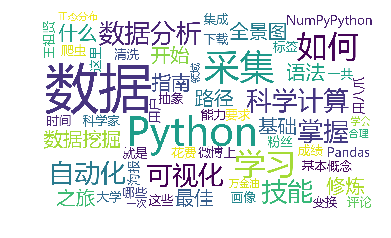

In [20]:
create_word_cloud(f)

In [27]:
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['学会', '就是', '什么']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f
f=remove_stop_words(f)

根据词频计算词云


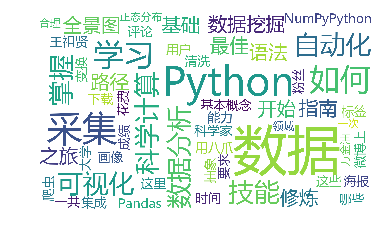

In [28]:
create_word_cloud(f)

In [43]:
# -*- coding:utf-8 -*-
# 网易云音乐 通过歌手 ID，生成该歌手的词云
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np


In [53]:
 
headers = {
       'Referer'  :'http://music.163.com',
       'Host'     :'music.163.com',
       'Accept'   :'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
       'User-Agent':'Chrome/10'
        }
 
# 得到某一首歌的歌词
def get_song_lyric(headers,lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
        lyric = res.json()['lrc']['lyric']
        new_lyric = re.sub(r'[\d:.[\]]','',lyric)
        return new_lyric
    else:
        return ''
#     print(res.json())
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f
# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
    wc = WordCloud(
        background_color="white",
       font_path="./msyh.ttf",
       max_words=100,
       width=2000,
       height=1200,
    )
#     print(cut_text)
    wordcloud = wc.generate(cut_text)
    # 写词云图片
#     wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
# 得到指定歌手页面 热门前 50 的歌曲 ID，歌曲名
def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id
    # 获取网页 HTML
    res = requests.request('GET', page_url, headers=headers)
    # 用 XPath 解析 前 50 首热门歌曲
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)
    # 设置热门歌曲的 ID，歌曲名称
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
        song_ids.append(href[9:])
        song_names.append(name)
#         print(href, '  ', name)
    return song_ids, song_names
# 设置歌手 ID
artist_id = '9548'
[song_ids, song_names] = get_songs(artist_id)

根据词频，开始生成词云!


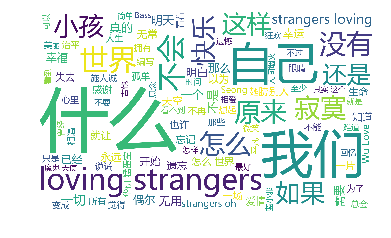

In [54]:
# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词 API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
#     print(song_name)
# 根据词频 生成词云
create_word_cloud(all_word)


In [61]:
# -*- coding: utf-8 -*-
# 使用 RandomForest 对 IRIS 数据集进行分类
# 利用 GridSearchCV 寻找最优参数
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


In [72]:
rf=RandomForestClassifier()
iris=load_iris()
param={'n_estimators':range(1,11)}
clf=GridSearchCV(estimator=rf,param_grid=param)
clf.fit(iris.data,iris.target)
print("最优分数:%.4lf"%clf.best_score_)
print("最优参数:",clf.best_params_)

最优分数:0.9600
最优参数: {'n_estimators': 1}


In [75]:
# -*- coding: utf-8 -*-
# 使用 RandomForest 对 IRIS 数据集进行分类
# 利用 GridSearchCV 寻找最优参数, 使用 Pipeline 进行流水作业
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [86]:
rf = RandomForestClassifier()
param={"randomforestclassifier__n_estimators":range(1,11)}
iris=load_iris()
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('randomforestclassifier',rf)
])
clf=GridSearchCV(estimator=pipeline,param_grid=param)
clf.fit(iris.data,iris.target)
print(" 最优分数： %.4lf" %clf.best_score_)
print(" 最优参数：", clf.best_params_)

 最优分数： 0.9667
 最优参数： {'randomforestclassifier__n_estimators': 6}


### credit default capstone

In [88]:
# -*- coding: utf-8 -*-
# 信用卡违约率分析
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

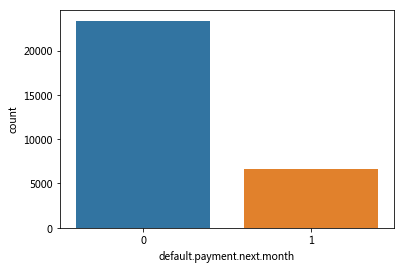

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


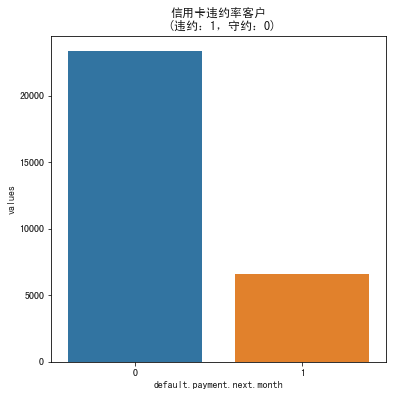

In [95]:
data=pd.read_csv('/Users/rickie/Desktop/Data_Analysis_YangC/credit_default-master/UCI_Credit_Card.csv')
data.shape
data.describe()
sns.countplot(data['default.payment.next.month'])
plt.show()

# next_month = data['default.payment.next.month'].value_counts()
# df = pd.DataFrame({'default.payment.next.month': next_month.index,'values': next_month.values})
# plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
# plt.figure(figsize = (6,6))
# plt.title('信用卡违约率客户\n (违约：1，守约：0)')
# sns.set_color_codes("pastel")
# sns.barplot(x = 'default.payment.next.month', y="values", data=df)
# locs, labels = plt.xticks()
# plt.show()

In [106]:
# data.drop(['ID'],inplace=True,axis=1)
target=data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

In [107]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)  
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
]
classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]
# 分类器参数
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

In [109]:
# 对具体的分类器进行 GridSearchCV 参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch 最优参数：", search.best_params_)
    print("GridSearch 最优分数： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print(" 准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

GridSearch 最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch 最优分数： 0.8174
 准确率 0.8172
GridSearch 最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch 最优分数： 0.8186
 准确率 0.8113
GridSearch 最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch 最优分数： 0.8000
 准确率 0.7997
GridSearch 最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch 最优分数： 0.8040
 准确率 0.8036


In [115]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
pipeline2=Pipeline([
            ('scaler', StandardScaler()),
            ('adaboostclassifier', ada)
    ])
param={'adaboostclassifier__n_estimators':[10,50,100]}
ABC=GridSearchCV(estimator=pipeline2,param_grid=param)
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)  
ABC.fit(train_x,train_y)
print(" 最优分数： %.4lf" %ABC.best_score_)
print(" 最优参数：", ABC.best_params_)
predict_y = ABC.predict(test_x)
print(" 准确率 %0.4lf" %accuracy_score(test_y, predict_y))

 最优分数： 0.8187
 最优参数： {'adaboostclassifier__n_estimators': 10}
 准确率 0.8129


## ARMA模型

90


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:13

AIC: 1619.6323
1990-12-31    5256.881355
1991-12-31    7205.857342
1992-12-31    8578.425564
1993-12-31    9629.396238
1994-12-31    9597.227198
1995-12-31    9192.028283
1996-12-31    7400.103444
1997-12-31    6337.990359
1998-12-31    6874.071093
1999-12-31    7794.470743
2000-12-31    8665.626699
Freq: A-DEC, dtype: float64


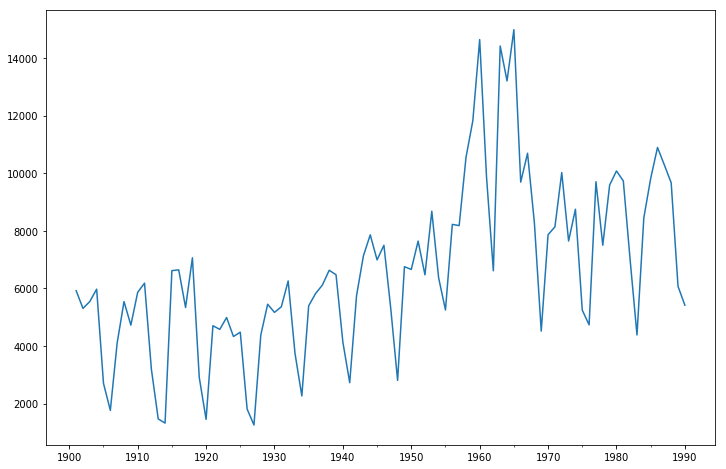

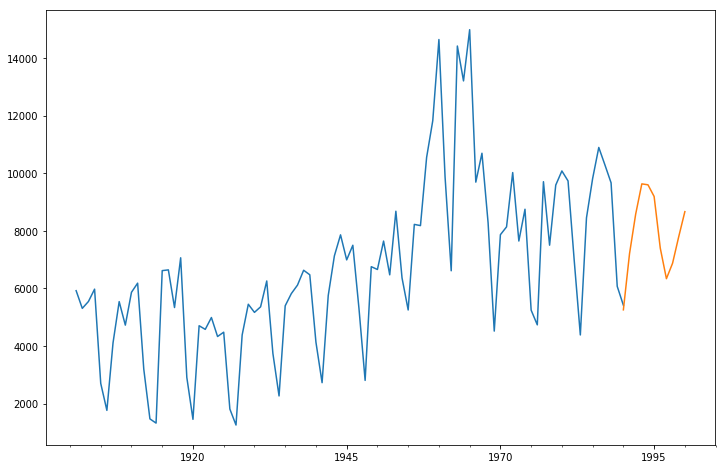

In [5]:
# coding:utf-8
# 用 ARMA 进行时间序列预测
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
# 创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
print(len(data))
data=pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')
# 绘制数据图
data.index = pd.Index(data_index)
data.plot(figsize=(12,8))
# plt.show()
# 创建 ARMA 模型 # 创建 ARMA 模型
arma = ARMA(data,(7,0)).fit()
print('AIC: %0.4lf' %arma.aic)
# 模型预测
predict_y = arma.predict('1990', '2000')
print(predict_y)
# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.loc['1901':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.show()


### Bitcoin price predict

In [3]:
# -*- coding: utf-8 -*-
# 比特币走势预测，使用时间序列 ARMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/Users/didi/Desktop/data_analysis/bitcoin-master/bitcoin_2012-01-01_to_2018-10-31.csv')
df.info()
# df.Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 8 columns):
Timestamp            2497 non-null object
Open                 2494 non-null float64
High                 2494 non-null float64
Low                  2494 non-null float64
Close                2494 non-null float64
Volume_(BTC)         2494 non-null float64
Volume_(Currency)    2494 non-null float64
Weighted_Price       2494 non-null float64
dtypes: float64(7), object(1)
memory usage: 156.1+ KB


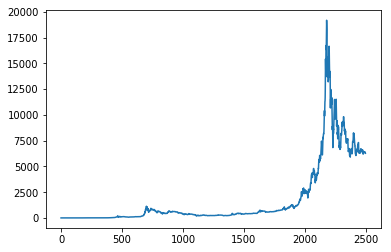

In [16]:
df.Weighted_Price.plot()

            Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01 2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02 2012-01-02  5.000000  5.000000  5.000000  5.000000     19.048000   
2012-01-03 2012-01-03  5.252500  5.252500  5.252500  5.252500     11.004660   
2012-01-04 2012-01-04  5.200000  5.223333  5.200000  5.223333     11.914807   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
2011-12-31         106.330084        4.471603  
2012-01-01          35.259720        4.806667  
2012-01-02          95.240000        5.000000  
2012-01-03          58.100651        5.252500  
2012-01-04          63.119578        5.208159  


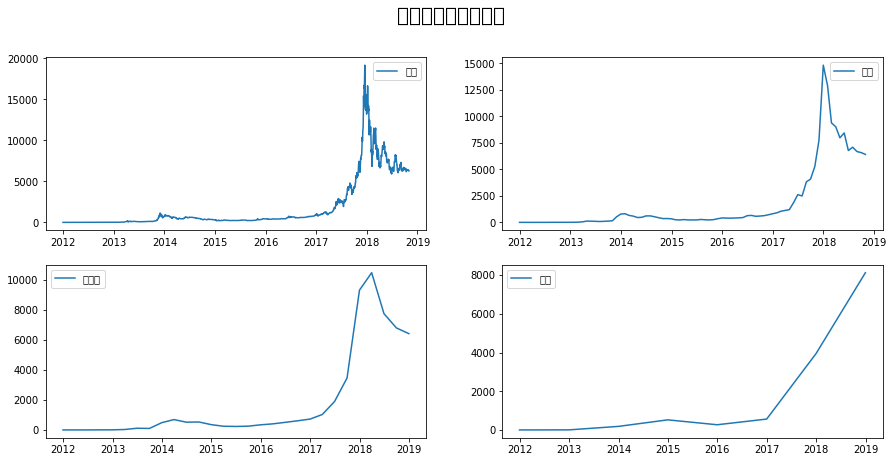

参数错误: (0, 2)
最优模型:                                ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.765
Date:                Fri, 22 Mar 2019   AIC                           1385.522
Time:                        18:22:06   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.409
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2097.2586   1566.771      1.339      0.184    -973.555    5168.072
ar.L1.Weighted_Price     0.9251      0.042     22.044      0.000       0.843     

In [7]:
# 数据加载
# df = pd.read_csv('./bitcoin_2012-01-01_to_2018-10-31.csv')
# 将时间作为 df 的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# 数据探索
print(df.head())
# 按照月，季度，年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()
# 按照天，月，季度，年来显示比特币的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.suptitle('比特币金额（美金）', fontsize=20)
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='按年')
plt.legend()
plt.show()
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
# 寻找最优 ARMA 模型参数，即 best_aic 最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型: ', best_model.summary())


In [27]:
# 比特币预测
df_month2 = df_month[['Weighted_Price']]# DataFrame
type(df_month[['Weighted_Price']])
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), datetime(2019, 3, 31), 
              datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
future
df_month2 = pd.concat([df_month2, future])
df_month2
df_month2['forecast'] = best_model.predict(start=0, end=91)
df_month2.head()
df_month2.tail()


,Close,High,Low,Open,Volume_(BTC),Volume_(Currency),Weighted_Price,forecast
2019-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5275.724928
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5037.716955
2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4817.531350
2019-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4613.833550
2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4425.388923


In [23]:
len(df_month)

83

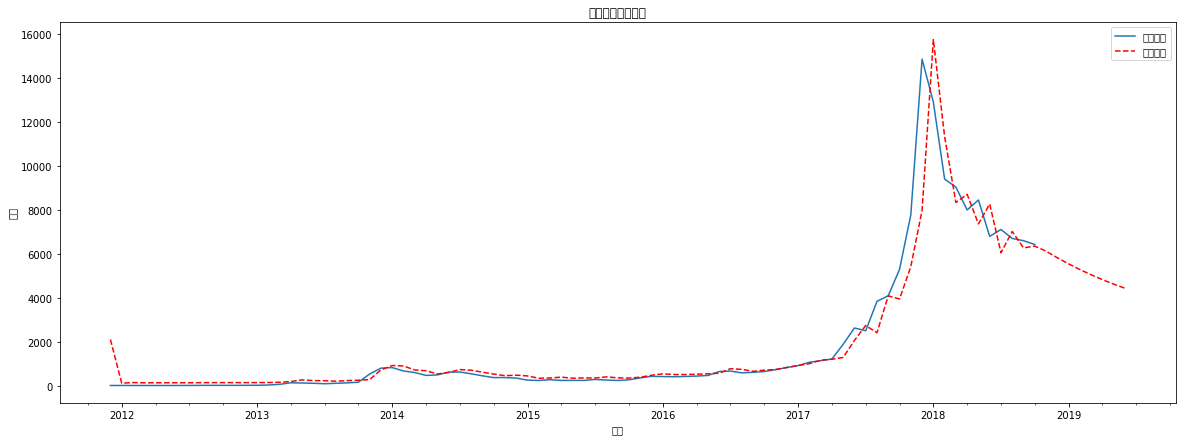

In [22]:
# 比特币预测结果显示
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='实际金额')
df_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()